In [112]:
import pickle

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

results = None

with open("results_data.pkl", 'rb') as pickle_file:
   results  = pickle.load(pickle_file)

filteredresults = {}
        
for k in results:
   system = k.split(";")[0]
   krgrid = int(k.split(";")[-2])
   kagrid = int(k.split(";")[-1])

   if system not in filteredresults:
      filteredresults[system] = []

   res = results[k].decode("utf-8").split("\n")
    
   totfitdens = float(res[1].split()[-1])
   totanadens = float(res[3].split()[-1])
   totalitera = int(res[4].split()[-2])
   totalenerg = float(res[5].split()[-1])

   difference = abs(totanadens - totfitdens)

   filteredresults[system].append([krgrid, kagrid, difference, totalenerg, totalitera])

   #print(system, krgrid, kagrid, difference, totalenerg)


array = np.asarray(filteredresults["H2O"])
X, Y = np.meshgrid(array[:,0], array[:,1])

print(X)
print(Y)
Z = np.zeros(X.shape, dtype=float)
for idxx, valx in enumerate(array[:,0]):
    for idxy, valy in enumerate(array[:,1]):
        uno = np.where(array[:,0] == valx)
        due = np.where(array[:,1] == valy)
        idx = np.intersect1d(uno, due)

        zval = array[idx,2]

        Z[idxx, idxy] = zval

In [122]:
import numpy as np
from mpl_toolkits import mplot3d

array = np.asarray(filteredresults["H2O"])

krgrid_effect_x = []
krgrid_effect_diff = []
krgrid_effect_energy = []
krgrid_effect_iterations = []

kagrid_effect_x = []
kagrid_effect_diff = []
kagrid_effect_energy = []
kagrid_effect_iterations = []

overall_effect = [] 
for idx in range(array.shape[0]):
    krgrid = array[idx,0]
    kagrid = array[idx,1]
    diff = array[idx,2]
    energy = array[idx,3]
    iter = array[idx,4]

    if krgrid == -1.0:
        kagrid_effect_x.append(kagrid)
        kagrid_effect_diff.append(diff)
        kagrid_effect_energy.append(energy)
        kagrid_effect_iterations.append(iter)
    elif kagrid == -1.0:
        krgrid_effect_x.append(krgrid)
        krgrid_effect_diff.append(diff)
        krgrid_effect_energy.append(energy)
        krgrid_effect_iterations.append(iter)
    else:
        overal_effect.append([krgrid, kagrid, diff])

KAGRID EFFECT

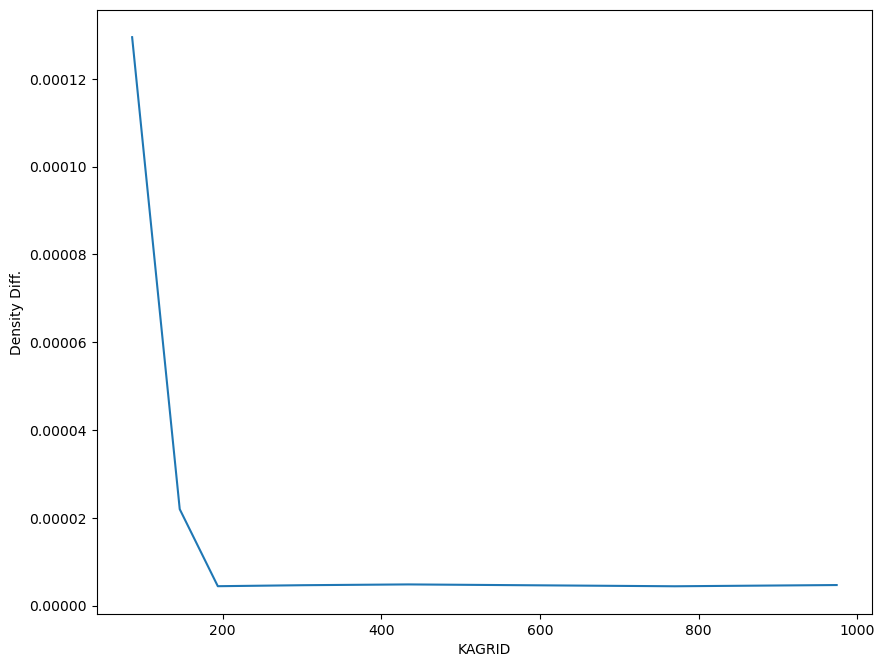

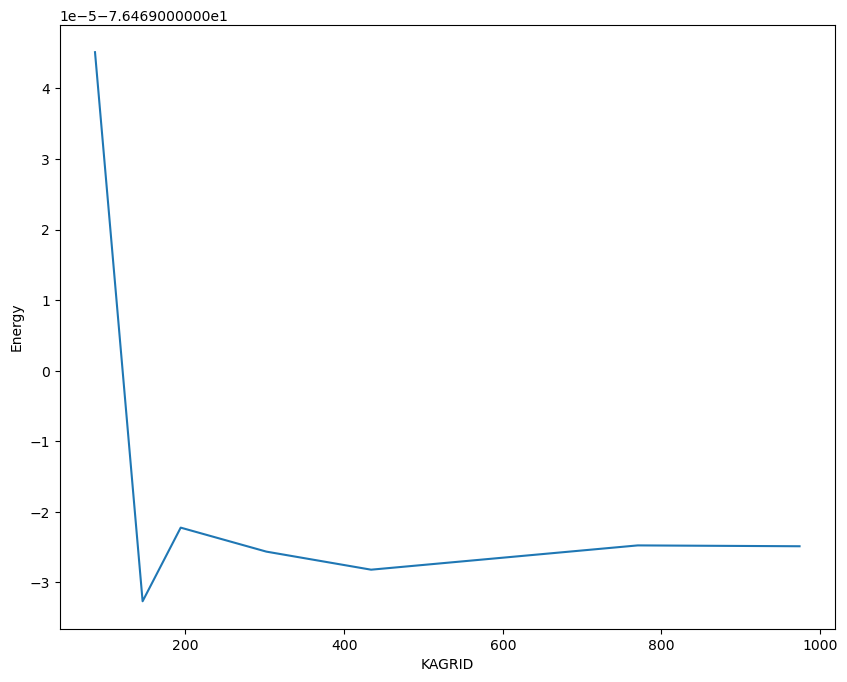

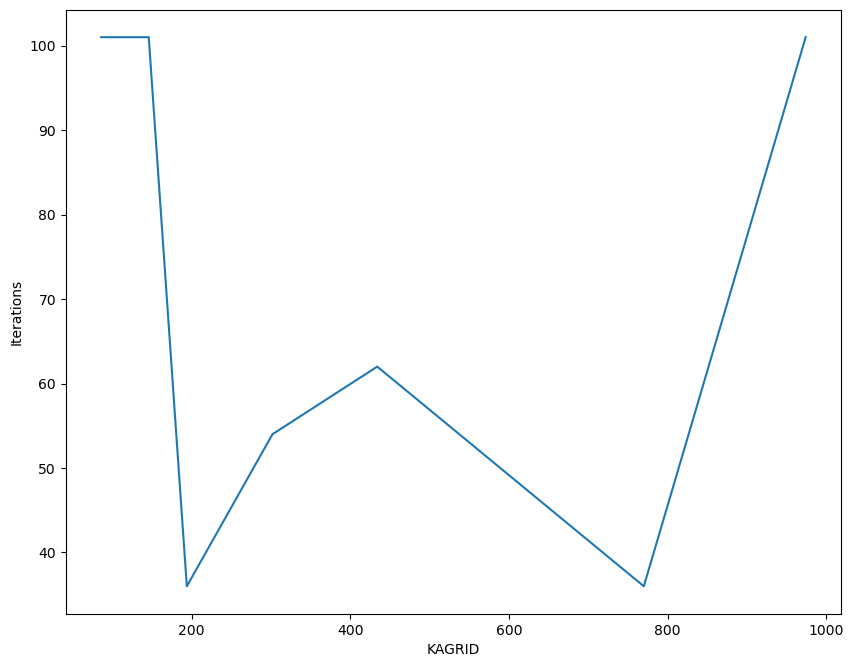

In [123]:
figure(figsize=(10, 8), dpi=100)
ax = plt.subplot()
ax.plot (kagrid_effect_x, kagrid_effect_diff)
ax.set_xlabel("KAGRID")
ax.set_ylabel("Density Diff.")
plt.show()

figure(figsize=(10, 8), dpi=100)
ax = plt.subplot()
ax.plot (kagrid_effect_x, kagrid_effect_energy)
ax.set_xlabel("KAGRID")
ax.set_ylabel("Energy")
plt.show()

figure(figsize=(10, 8), dpi=100)
ax = plt.subplot()
ax.plot (kagrid_effect_x, kagrid_effect_iterations)
ax.set_xlabel("KAGRID")
ax.set_ylabel("Iterations")
plt.show()

KRGRID EFFECT

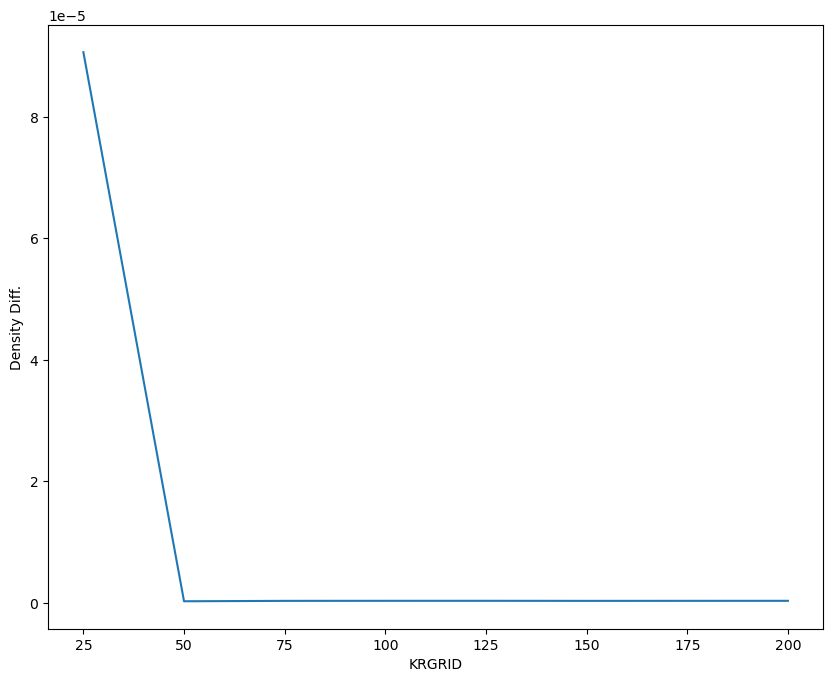

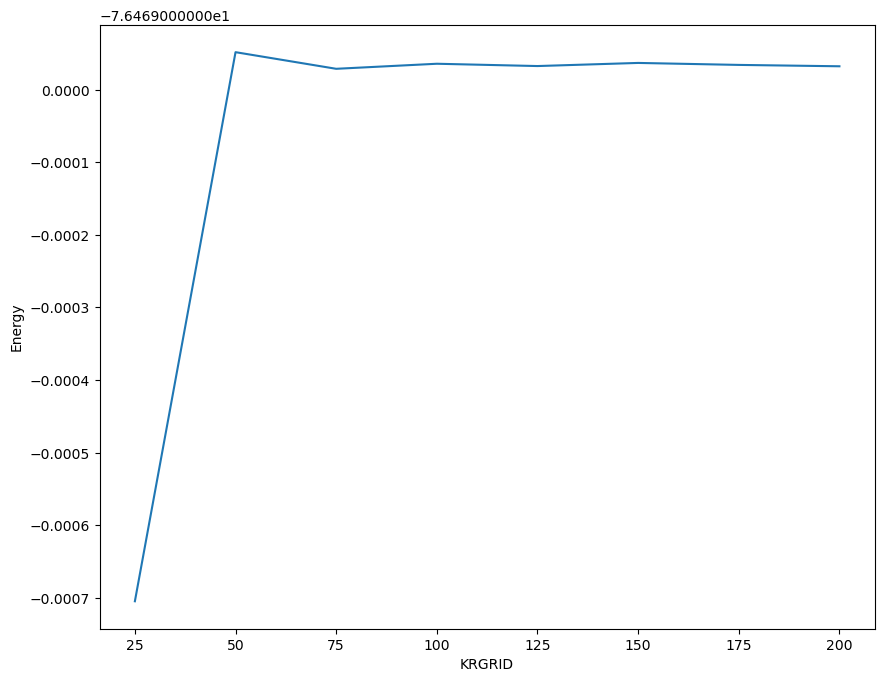

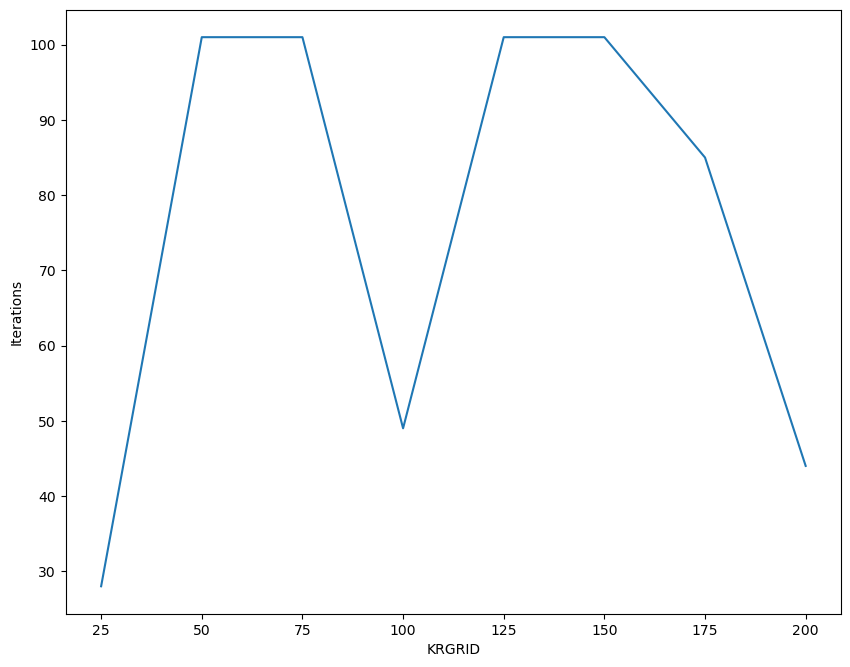

In [124]:
figure(figsize=(10, 8), dpi=100)
ax = plt.subplot()
ax.plot (krgrid_effect_x, krgrid_effect_diff)
ax.set_xlabel("KRGRID")
ax.set_ylabel("Density Diff.")
plt.show()

figure(figsize=(10, 8), dpi=100)
ax = plt.subplot()
ax.plot (krgrid_effect_x, krgrid_effect_energy)
ax.set_xlabel("KRGRID")
ax.set_ylabel("Energy")
plt.show()

figure(figsize=(10, 8), dpi=100)
ax = plt.subplot()
ax.plot (krgrid_effect_x, krgrid_effect_iterations)
ax.set_xlabel("KRGRID")
ax.set_ylabel("Iterations")
plt.show()